In [1]:
import shap
import pickle
import pandas as pd

In [2]:
with open("S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps = data["shaps"]
    infos = data["infos"]

In [3]:
pd.DataFrame.from_dict(infos)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'friedman_mse', 'splitter': 'bes...",0.3,1
1,EN,"{'alpha': 0.15729272385950474, 'l1_ratio': 0.1...",0.3,5
2,GBR,"{'n_estimators': 356, 'learning_rate': 0.00633...",0.3,5
3,KNR,"{'n_neighbors': 44, 'weights': 'distance', 'al...",0.3,5
4,RFR,"{'n_estimators': 323, 'max_depth': 8, 'min_sam...",0.3,5
5,SVR,"{'kernel': 'linear', 'C': 0.004174129907473797...",0.3,5
6,XGBR,"{'n_estimators': 183, 'max_depth': 9, 'learnin...",0.3,5


In [4]:
idx = 6
shap_values = shaps[idx]["shap_values"]
model = shaps[idx]["model"]

print(f"Model: {model}")

Model: XGBR


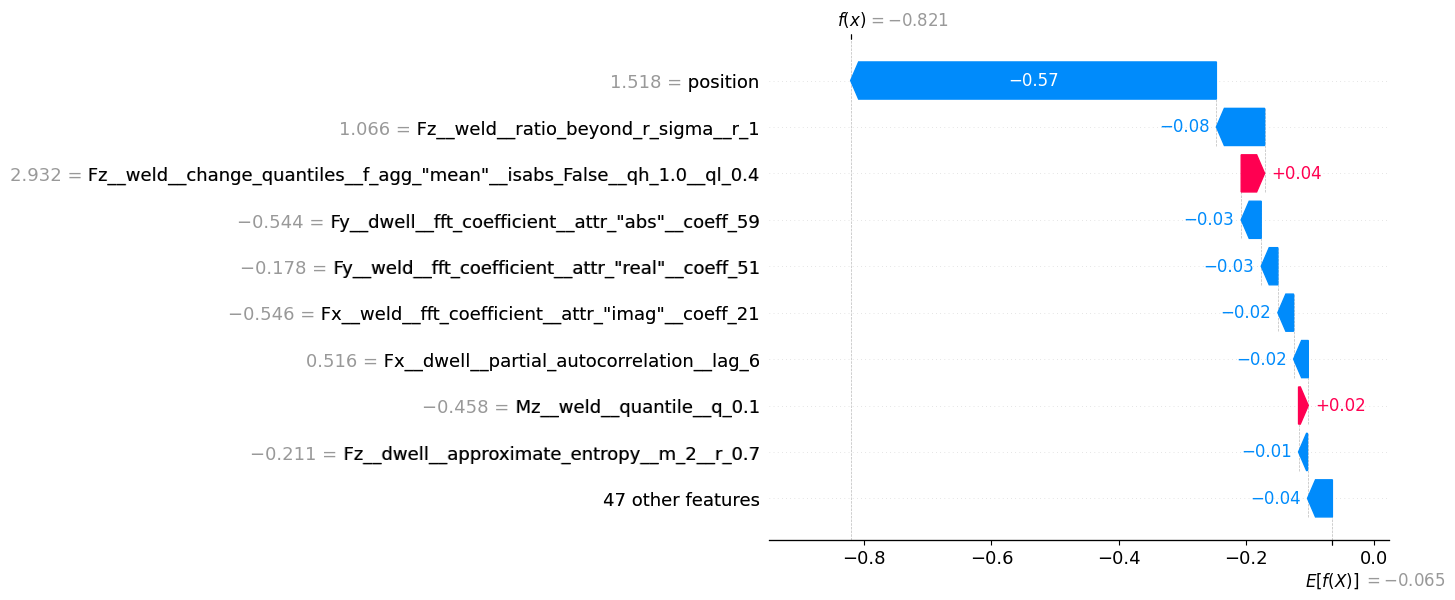

In [5]:
# Plot SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

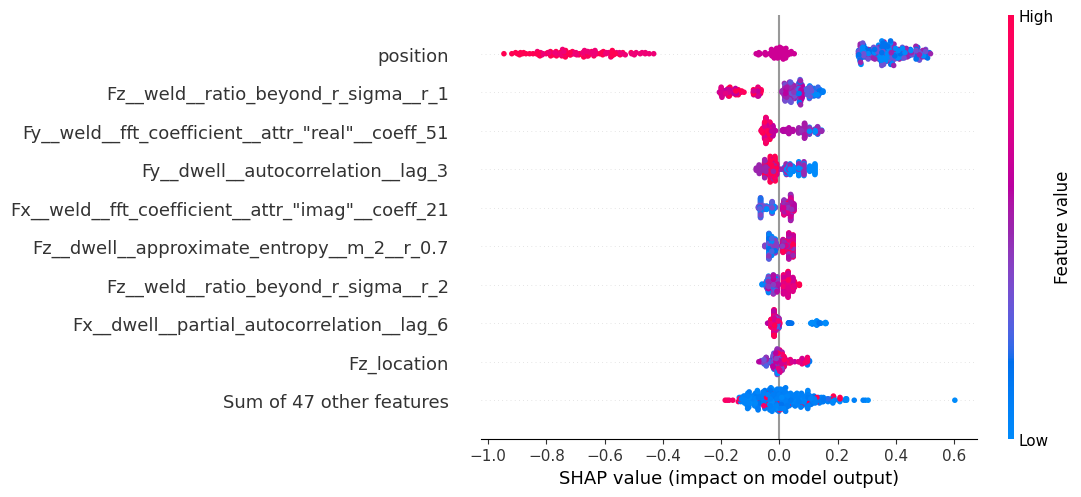

In [6]:
# Plot SHAP summary plot
shap.plots.beeswarm(shap_values)

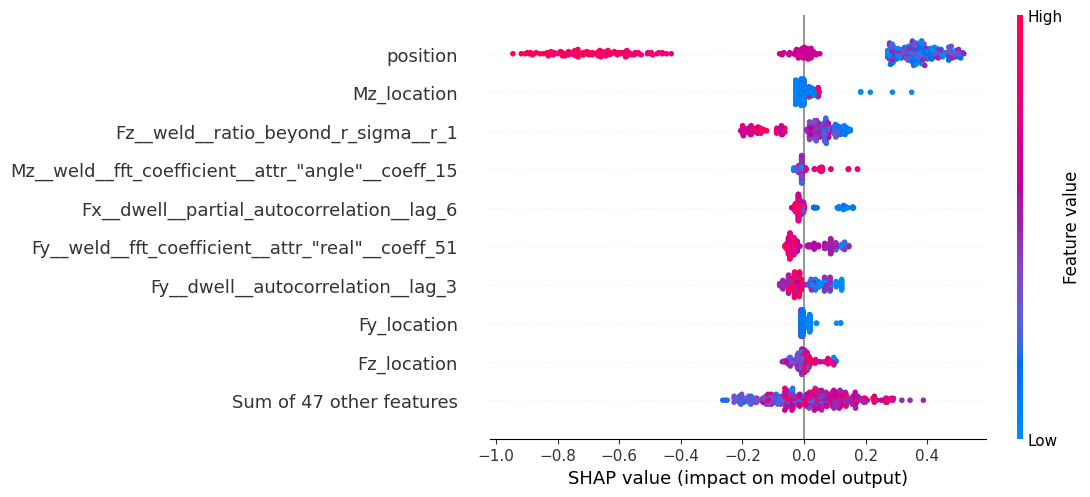

In [7]:
# Plot SHAP summary plot with features ordered by importance
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

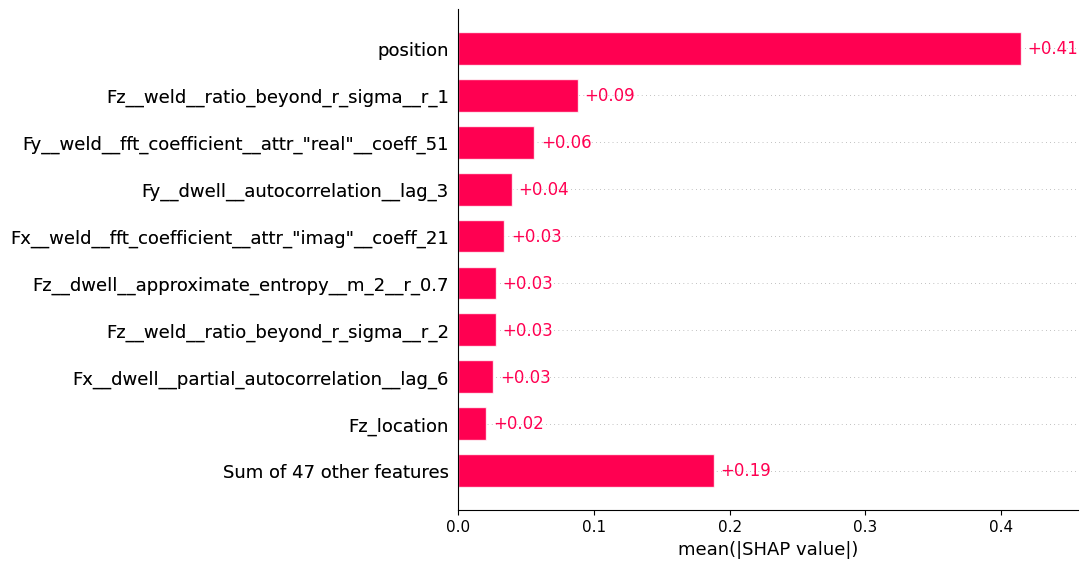

In [8]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

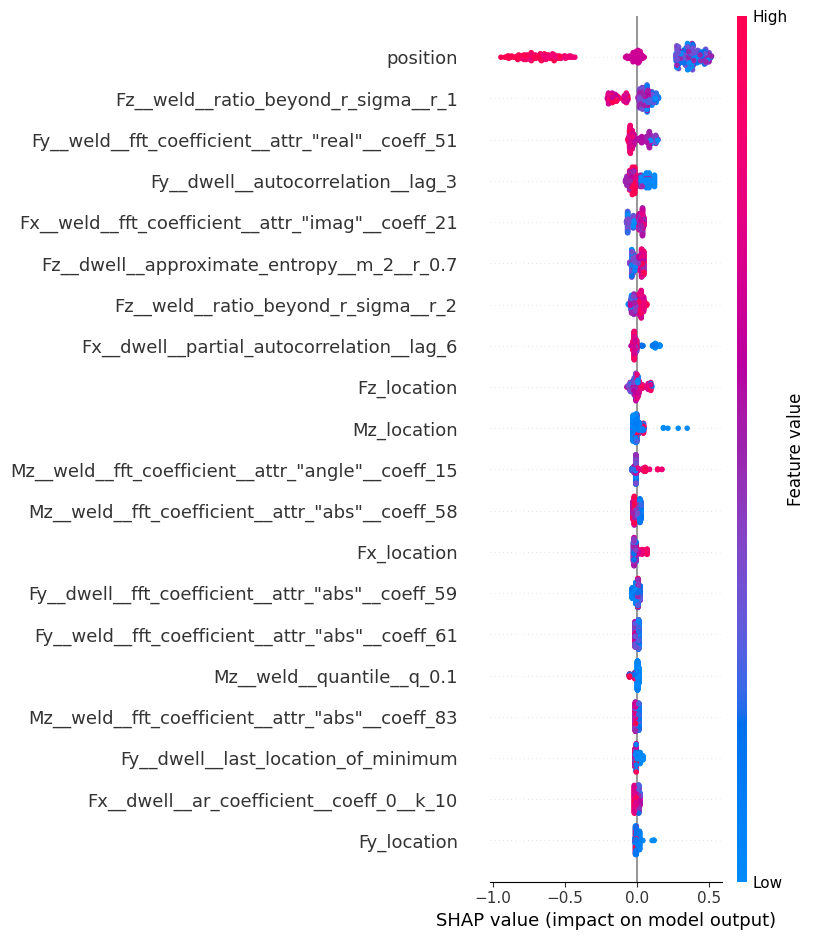

In [9]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

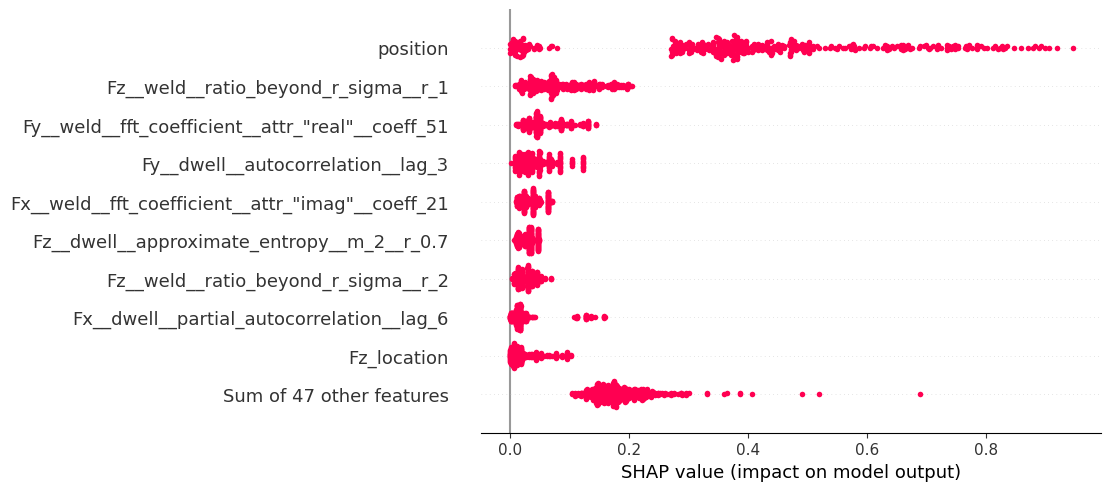

In [10]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

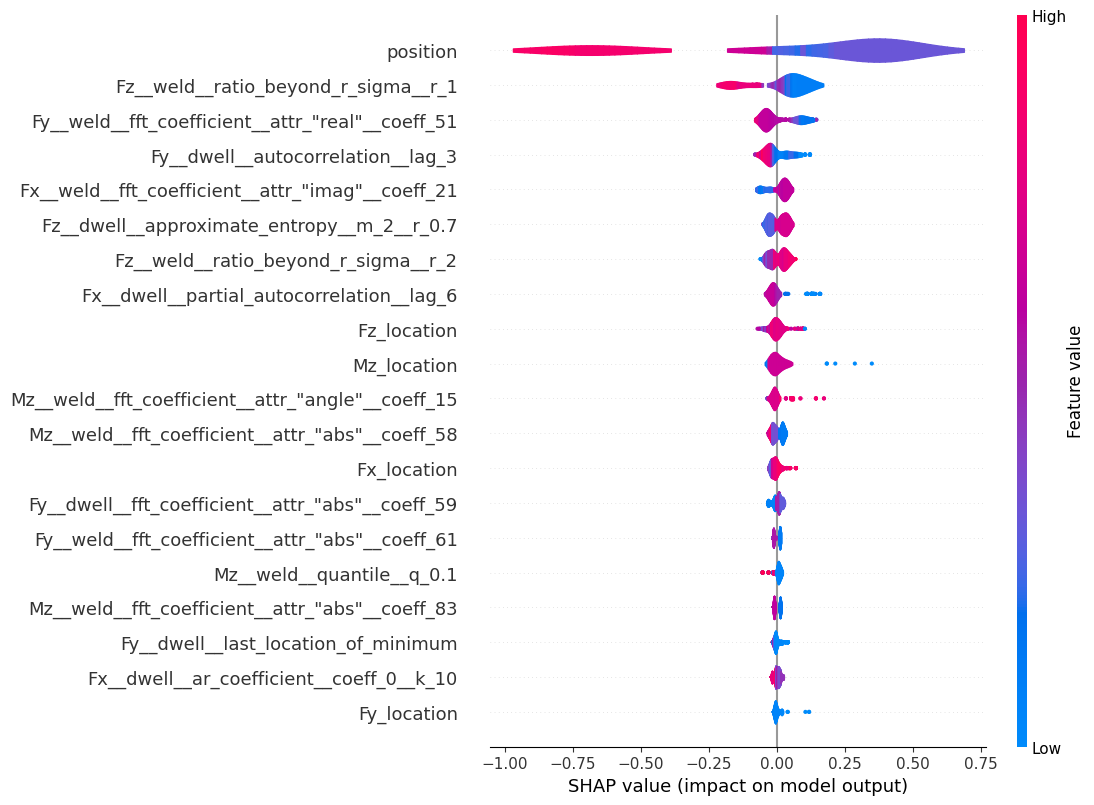

In [11]:
shap.plots.violin(shap_values)

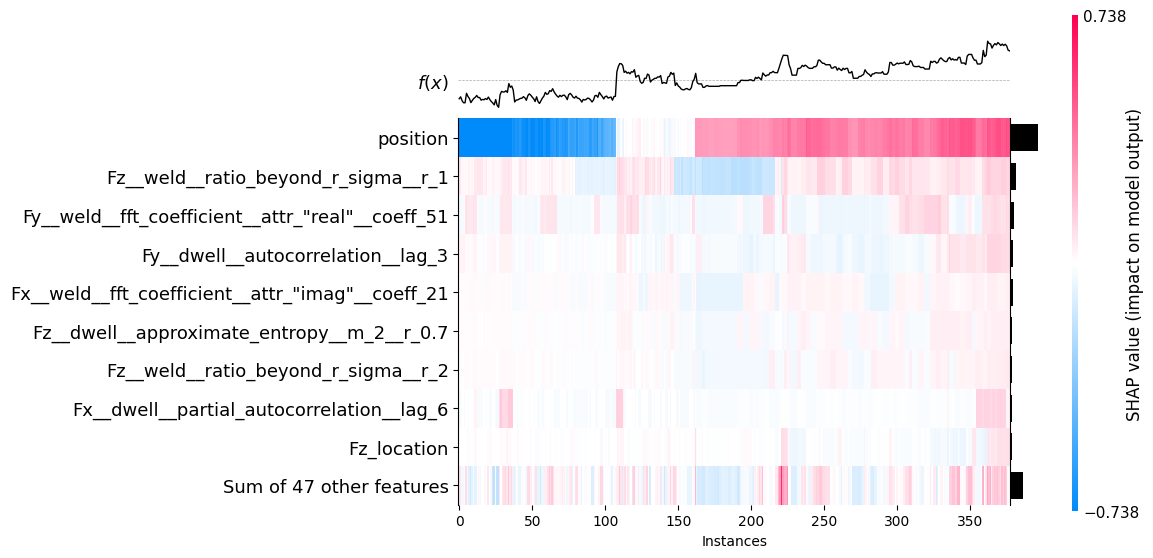

<Axes: xlabel='Instances'>

In [12]:
shap.plots.heatmap(shap_values)

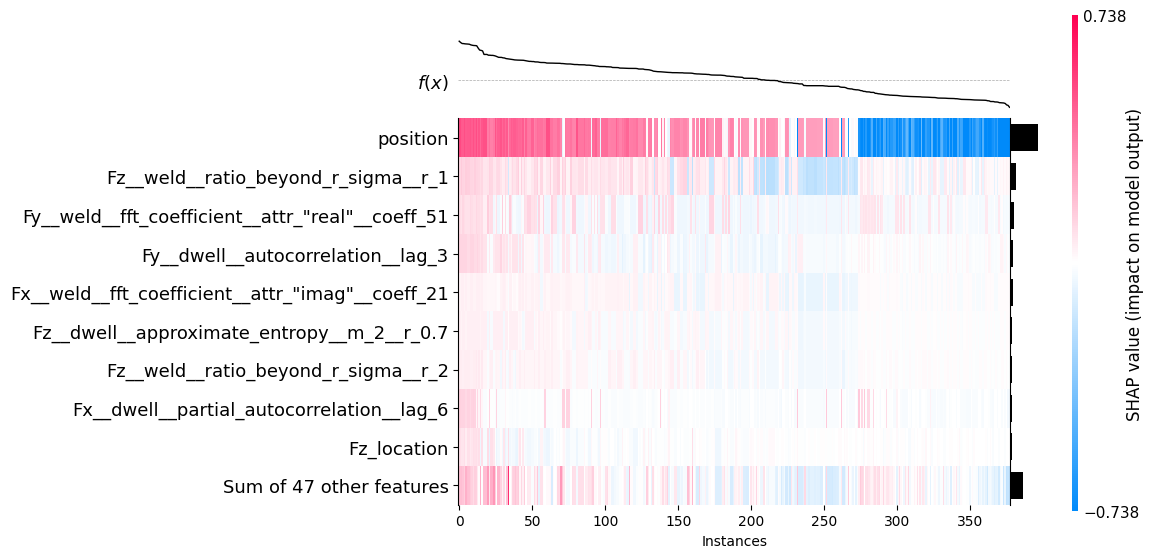

<Axes: xlabel='Instances'>

In [13]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

In [14]:
import numpy as np

feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
0,position,0.414564
48,Fz__weld__ratio_beyond_r_sigma__r_1,0.087954
42,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.055782
19,Fy__dwell__autocorrelation__lag_3,0.039555
37,"Fx__weld__fft_coefficient__attr_""imag""__coeff_21",0.033920
24,Fz__dwell__approximate_entropy__m_2__r_0.7,0.027749
49,Fz__weld__ratio_beyond_r_sigma__r_2,0.027455
12,Fx__dwell__partial_autocorrelation__lag_6,0.025622
6,Fz_location,0.020443
7,Mz_location,0.020193


In [15]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
0,position,0.414564,SHAP_importance,1
48,Fz__weld__ratio_beyond_r_sigma__r_1,0.087954,SHAP_importance,2
42,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.055782,SHAP_importance,3
19,Fy__dwell__autocorrelation__lag_3,0.039555,SHAP_importance,4
37,"Fx__weld__fft_coefficient__attr_""imag""__coeff_21",0.033920,SHAP_importance,5
24,Fz__dwell__approximate_entropy__m_2__r_0.7,0.027749,SHAP_importance,6
49,Fz__weld__ratio_beyond_r_sigma__r_2,0.027455,SHAP_importance,7
12,Fx__dwell__partial_autocorrelation__lag_6,0.025622,SHAP_importance,8
6,Fz_location,0.020443,SHAP_importance,9
7,Mz_location,0.020193,SHAP_importance,10


In [16]:
ranking.to_excel("S02.xlsx", index=False)